# piston example: some symbolic computations

In [1]:
import sympy
sympy.init_printing()

## GENERIC formulation

$$
		\begin{bmatrix}
			\dot{q} \\
			\dot{p} \\
			\dot{s}_1 \\
			\dot{s}_2
		\end{bmatrix}
		\: = \:
		\begin{bmatrix}
			0 && 1 && 0 && 0 \\
			-1 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
		\end{bmatrix}
		\,
		\begin{bmatrix}
			\left(\pi_2 - \pi_1\right) A \\
			v \\
			\theta_1 \\
			\theta_2
		\end{bmatrix}
		\: + \:
		\begin{bmatrix}
			0 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
			0 && 0 && \alpha \, \frac{\theta_2}{\theta_1} && -\alpha \\
			0 && 0 && -\alpha && \alpha \, \frac{\theta_1}{\theta_2}
		\end{bmatrix}
		\,
		\begin{bmatrix}
			0 \\ 0 \\ 1 \\ 1
		\end{bmatrix}
$$

In [2]:
θ_1 = sympy.Symbol('θ_1', real=True, positive=True)
θ_2 = sympy.Symbol('θ_2', real=True, positive=True)
π_1 = sympy.Symbol('π_1', real=True, positive=True)
π_2 = sympy.Symbol('π_2', real=True, positive=True)
υ = sympy.Symbol('υ', real=True)

A = sympy.Symbol('A', real=True, positive=True)
α = sympy.Symbol('α', real=True, positive=True)
d = sympy.Symbol('d', real=True, positive=True)

In [3]:
dE = sympy.Matrix([
    [(π_2 - π_1) * A],
    [υ],
    [θ_1],
    [θ_2]
])

In [4]:
dS = sympy.Matrix([
    [0],
    [0],
    [1],
    [1]
])

In [5]:
J = sympy.Matrix([
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

In [6]:
assert J.is_anti_symmetric()
assert (J @ dS).applyfunc(sympy.simplify).is_zero

In [7]:
# heat conduction
R_α = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, α*θ_2/θ_1, -α],
    [0, 0, -α, α*θ_1/θ_2]
])
R_α

⎡0  0   0     0  ⎤
⎢                ⎥
⎢0  0   0     0  ⎥
⎢                ⎥
⎢      α⋅θ₂      ⎥
⎢0  0  ────   -α ⎥
⎢       θ₁       ⎥
⎢                ⎥
⎢            α⋅θ₁⎥
⎢0  0   -α   ────⎥
⎣             θ₂ ⎦

In [8]:
assert R_α.is_symmetric()
assert all([val >= 0 for val in R_α.eigenvals()])
assert (R_α @ dE).applyfunc(sympy.simplify).is_zero

In [9]:
# friction between piston and cylinder
# dissipated kinetic energy goes to internal energy of both compartments with equal shares
R_d = sympy.Matrix([
    [0, 0, 0, 0],
    [0, d*(θ_1+θ_2)/2, -d*υ/2, -d*υ/2],
    [0, -d*υ/2, d*υ**2/(2*θ_1), 0],
    [0, -d*υ/2, 0, d*υ**2/(2*θ_2)]
])
R_d

⎡0       0         0      0  ⎤
⎢                            ⎥
⎢   d⋅(θ₁ + θ₂)  -d⋅υ   -d⋅υ ⎥
⎢0  ───────────  ─────  ─────⎥
⎢        2         2      2  ⎥
⎢                            ⎥
⎢                   2        ⎥
⎢      -d⋅υ      d⋅υ         ⎥
⎢0     ─────     ────     0  ⎥
⎢        2       2⋅θ₁        ⎥
⎢                            ⎥
⎢                          2 ⎥
⎢      -d⋅υ             d⋅υ  ⎥
⎢0     ─────       0    ──── ⎥
⎣        2              2⋅θ₂ ⎦

In [10]:
assert R_d.is_symmetric()
assert (R_d @ dE).applyfunc(sympy.simplify).is_zero

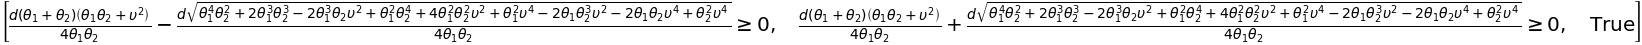

In [11]:
[val >= 0 for val in R_d.eigenvals()]

In [12]:
R = R_α + R_d
(J @ dE + R @ dS).applyfunc(sympy.simplify)

⎡        υ         ⎤
⎢                  ⎥
⎢A⋅(π₁ - π₂) - d⋅υ ⎥
⎢                  ⎥
⎢   2              ⎥
⎢d⋅υ               ⎥
⎢──── - α⋅θ₁ + α⋅θ₂⎥
⎢ 2                ⎥
⎢──────────────────⎥
⎢        θ₁        ⎥
⎢                  ⎥
⎢   2              ⎥
⎢d⋅υ               ⎥
⎢──── + α⋅θ₁ - α⋅θ₂⎥
⎢ 2                ⎥
⎢──────────────────⎥
⎣        θ₂        ⎦

## Port-Hamiltonian reformulation

In [13]:
θ_0 = sympy.Symbol('θ_0', real=True, positive=True)

In [14]:
dH = dE - θ_0 * dS
dH

⎡A⋅(-π₁ + π₂)⎤
⎢            ⎥
⎢     υ      ⎥
⎢            ⎥
⎢  -θ₀ + θ₁  ⎥
⎢            ⎥
⎣  -θ₀ + θ₂  ⎦

In [15]:
J @ dH

⎡      υ      ⎤
⎢             ⎥
⎢-A⋅(-π₁ + π₂)⎥
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎣      0      ⎦

In [16]:
C = sympy.eye(4)
D_α = R_α / θ_0
y_α = C.T @ dH
u_α = -D_α @ y_α
u_α = u_α.applyfunc(sympy.simplify)
u_α

⎡     0     ⎤
⎢           ⎥
⎢     0     ⎥
⎢           ⎥
⎢      α⋅θ₂ ⎥
⎢ -α + ──── ⎥
⎢       θ₁  ⎥
⎢           ⎥
⎢α⋅(θ₁ - θ₂)⎥
⎢───────────⎥
⎣     θ₂    ⎦

In [17]:
C = sympy.eye(4)
D_d = R_d / θ_0
y_d = C.T @ dH
u_d = -D_d @ y_d
u_d = u_d.applyfunc(sympy.simplify)
u_d

⎡ 0  ⎤
⎢    ⎥
⎢-d⋅υ⎥
⎢    ⎥
⎢   2⎥
⎢d⋅υ ⎥
⎢────⎥
⎢2⋅θ₁⎥
⎢    ⎥
⎢   2⎥
⎢d⋅υ ⎥
⎢────⎥
⎣2⋅θ₂⎦

In [18]:
D = D_α + D_d
assert (θ_0 * C @ D @ C.T - R).applyfunc(sympy.simplify).is_zero

In [19]:
(J @ dH + C @ u_α + C @ u_d)

⎡         υ         ⎤
⎢                   ⎥
⎢-A⋅(-π₁ + π₂) - d⋅υ⎥
⎢                   ⎥
⎢     2             ⎥
⎢  d⋅υ        α⋅θ₂  ⎥
⎢  ──── - α + ────  ⎥
⎢  2⋅θ₁        θ₁   ⎥
⎢                   ⎥
⎢   2               ⎥
⎢d⋅υ    α⋅(θ₁ - θ₂) ⎥
⎢──── + ─────────── ⎥
⎣2⋅θ₂        θ₂     ⎦

In [20]:
u_α, y_α, (y_α.T @ u_α).applyfunc(sympy.simplify)[0]

⎛⎡     0     ⎤                                                            ⎞
⎜⎢           ⎥                                                            ⎟
⎜⎢     0     ⎥  ⎡A⋅(-π₁ + π₂)⎤                                            ⎟
⎜⎢           ⎥  ⎢            ⎥                                            ⎟
⎜⎢      α⋅θ₂ ⎥  ⎢     υ      ⎥  α⋅(θ₁ - θ₂)⋅(-θ₁⋅(θ₀ - θ₂) + θ₂⋅(θ₀ - θ₁))⎟
⎜⎢ -α + ──── ⎥, ⎢            ⎥, ──────────────────────────────────────────⎟
⎜⎢       θ₁  ⎥  ⎢  -θ₀ + θ₁  ⎥                    θ₁⋅θ₂                   ⎟
⎜⎢           ⎥  ⎢            ⎥                                            ⎟
⎜⎢α⋅(θ₁ - θ₂)⎥  ⎣  -θ₀ + θ₂  ⎦                                            ⎟
⎜⎢───────────⎥                                                            ⎟
⎝⎣     θ₂    ⎦                                                            ⎠

$$
y_{\alpha}^\mathrm{T} \, u_{\alpha}
\: = \:
- \theta_0 \:
\alpha \, \frac{{\left( \theta_1 - \theta_2 \right)}^2}{\theta_1 \, \theta_2}
\: = \:
- \theta_0 \:
\alpha \, \left( \frac{\theta_1 - \theta_2}{\theta_2} + \frac{\theta_2 - \theta_1}{\theta_1} \right)
$$

In [21]:
u_d, y_d, (y_d.T @ u_d).applyfunc(sympy.simplify)[0]

⎛⎡ 0  ⎤                                     ⎞
⎜⎢    ⎥                                     ⎟
⎜⎢-d⋅υ⎥                                     ⎟
⎜⎢    ⎥  ⎡A⋅(-π₁ + π₂)⎤                     ⎟
⎜⎢   2⎥  ⎢            ⎥         2           ⎟
⎜⎢d⋅υ ⎥  ⎢     υ      ⎥  -d⋅θ₀⋅υ ⋅(θ₁ + θ₂) ⎟
⎜⎢────⎥, ⎢            ⎥, ───────────────────⎟
⎜⎢2⋅θ₁⎥  ⎢  -θ₀ + θ₁  ⎥        2⋅θ₁⋅θ₂      ⎟
⎜⎢    ⎥  ⎢            ⎥                     ⎟
⎜⎢   2⎥  ⎣  -θ₀ + θ₂  ⎦                     ⎟
⎜⎢d⋅υ ⎥                                     ⎟
⎜⎢────⎥                                     ⎟
⎝⎣2⋅θ₂⎦                                     ⎠

$$
y_{d}^\mathrm{T} \, u_{d}
\: = \:
- \theta_0 \:
\frac{d \, \upsilon^2}{2} \, \frac{\theta_1 + \theta_2}{\theta_1 \, \theta_2}
\: = \:
- \theta_0 \:
\frac{d \, \upsilon^2}{2} \, \left( \frac{1}{\theta_1} + \frac{1}{\theta_2} \right)
$$

## Port-Hamiltonian reformulation 2

In [22]:
f_6 = θ_1 - θ_0
f_9 = θ_2 - θ_0
e_6 = 1/(θ_0 + f_6) * α * (f_9 - f_6)
e_9 = 1/(θ_0 + f_9) * α * (f_6 - f_9)

In [23]:
(e_6*f_6 + e_9*f_9)
# this is always negative
# net outflow is negative == net inflow is positive == exergy destruction rate is postive

In [24]:
f_4 = υ
f_7 = θ_1 - θ_0
f_10 = θ_2 - θ_0
e_4 = -d * f_4
e_7 = 1/(θ_0 + f_7) * sympy.Rational(1,2) * d * f_4**2
e_10 = 1/(θ_0 + f_10) * sympy.Rational(1,2) * d * f_4**2

In [25]:
(e_4*f_4 + e_7*f_7 + e_10*f_10)